## Python Libraries

In [1]:
#Data provider
import yfinance as yf

#Time
from datetime import datetime as dt

#Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

#Scientific libraries
import numpy as np
import pandas as pd
import networkx as nx
from community.community_louvain import best_partition
import statsmodels.api as sm

# I) Data acquisition

We create a function named **asset** to import all desired asset prices from **Yahoo finance API**. We stock each asset price in a variable so that we can process it outside any sequential data type.

In [2]:
def asset(symbol, start, end, target_metrics):
    'Return a series of historical target metric'
    asset = yf.Ticker(symbol).history(interval = '1mo', start = start, end = end)[target_metrics].dropna()
    return asset

### Equities

In [3]:
##Tech
apple = asset('AAPL', '2014-01-01', dt.now(), 'Close')
meta = asset('META', '2014-01-01', dt.now(), 'Close')
google = asset('GOOG', '2014-01-01', dt.now(), 'Close')
amazon = asset('AMZN', '2014-01-01', dt.now(), 'Close')
nvidia = asset('NVDA', '2014-01-01', dt.now(), 'Close')
intel = asset('INTC','2014-01-01', dt.now(), 'Close')
tsm = asset('TSM','2014-01-01', dt.now(), 'Close') #Taiwan semiconductor
ibm = asset('IBM','2014-01-01', dt.now(), 'Close' )
qualcomm = asset('QCOM','2014-01-01', dt.now(), 'Close' )
ptc = asset('PTC','2014-01-01', dt.now(), 'Close' ) # Parametric Technologic Corporation | IoT & AR | USA
snap = asset('SNAP','2014-01-01', dt.now(), 'Close')
oracle = asset('ORCL','2014-01-01', dt.now(), 'Close')
ubisoft= asset('UBI.PA','2014-01-01', dt.now(), 'Close' ) #Eur
samsung = asset('SMSN.IL','2014-01-01', dt.now(), 'Close')
soitec = asset('SOI.PA','2014-01-01', dt.now(), 'Close') #Semiconductor Fra
tencent = asset('TCEHY','2014-01-01', dt.now(), 'Close')
amd = asset('AMD','2014-01-01', dt.now(),'Close') # Advanced Micro Devices
micron = asset('MU','2014-01-01', dt.now(),'Close') #Micron Tech inc
lg = asset('066570.KS','2014-01-01', dt.now(),'Close') # KRW LG Electronics
asml = asset('ASML.AS','2014-01-01', dt.now(),'Close') # ASML| (production of photolithographic) | Netherland

ti = asset('TXN','2014-01-01', dt.now(),'Close') # Texas Instruments

siemens = asset('SIE.DE','2014-01-01', dt.now(),'Close') #Eur
sap = asset('SAP.DE','2014-01-01', dt.now(),'Close') #Software
mastercard = asset('MA','2014-01-01', dt.now(), 'Close')
baidu = asset('BIDU','2014-01-01', dt.now(),'Close') #Chinese Search Engine

visa = asset('V','2014-01-01', dt.now(),'Close')
adobe = asset('ADBE', '2014-01-01', dt.now(),'Close')

#Automobile
mercedes = asset('MBG.F','2014-01-01', dt.now(),'Close')
tesla = asset('TSLA','2014-01-01', dt.now(), 'Close')
volkswagen = asset('VOW3.DE','2014-01-01', dt.now(), 'Close')
stellantis = asset('STLA','2014-01-01', dt.now(), 'Close')
gm = asset('GM','2014-01-01', dt.now(), 'Close') #General Motor
renault = asset('RNO.PA','2014-01-01', dt.now(), 'Close') #Eur
continental = asset('CON.DE','2014-01-01', dt.now(), 'Close') #Eur
hyundai = asset('HYMTF','2014-01-01', dt.now(), 'Close') 

#Infrastructure & Service
bouyges = asset('EN.PA','2014-01-01', dt.now(),'Close')
orange = asset("ORA.PA",'2014-01-01', dt.now(),'Close') #Eur
alstom =asset('ALO.PA','2014-01-01', dt.now(), 'Close') #Eur
maersk = asset('MAERSK-B.CO','2014-01-01', dt.now(), 'Close') #Dkk
cosco = asset('CICOY','2014-01-01', dt.now(), 'Close')
acciona = asset('ANA.MC','2014-01-01', dt.now(), 'Close') #Eur
t_mobile = asset('TMUS','2014-01-01', dt.now(), 'Close')
boeing = asset('BA','2014-01-01', dt.now(), 'Close')

#Biotech & Pharma
novavax= asset('NVAX','2014-01-01', dt.now(), 'Close' )
pfizer = asset('PFE','2014-01-01', dt.now(), 'Close')
elexis = asset('AXSM','2014-01-01', dt.now(), 'Close')
catalyst = asset('CPRX','2014-01-01', dt.now(), 'Close')
genmab = asset('GMAB','2014-01-01', dt.now(), 'Close')
qgsa = asset('ALQGC.PA','2014-01-01', dt.now(), 'Close' ) #
jnj = asset('JNJ','2014-01-01', dt.now(), 'Close') #Johnson & Johnson
jh = asset('600276.SS','2014-01-01', dt.now(), 'Close') #Jiangsu Hengrui Medicine
sunpharma = asset('SUNPHARMA.NS','2014-01-01', dt.now(), 'Close')
bayer = asset('BAYN.DE','2014-01-01', dt.now(), 'Close')

# 
alibaba = asset('BABA','2014-01-01', dt.now(), 'Close')
ne = asset('EDU','2014-01-01', dt.now(), 'Close') # New education oriental

#Agro & Food & drink
carrefour = asset('CA.PA','2014-01-01', dt.now(), 'Close')#Eur
deere = asset('DE','2014-01-01', dt.now(), 'Close') #Fabrication de matériel agricole
walmart = asset('WMT','2014-01-01', dt.now(), 'Close')
danone  = asset('BN.PA','2014-01-01', dt.now(), 'Close')

pr = asset('RI.PA','2014-01-01', dt.now(),'Close') #Pernot Ricard
diageo = asset('DEO','2014-01-01', dt.now(), 'Close')
coca = asset('KO', '2014-01-01', dt.now(), 'Close')
pg = asset('PG','2014-01-01', dt.now(),'Close') #Procter & Gamble

#lifestyle
lvmh = asset('MC.PA','2014-01-01', dt.now(), 'Close') #Eur
kering = asset('KER.PA', '2014-01-01', dt.now(), 'Close') # Eur
loreal = asset("OR.PA", '2014-01-01', dt.now(), 'Close')# Eur
hermes = asset('RMS.PA', '2014-01-01', dt.now(), 'Close')# Eur
prada = asset('PRDSY','2014-01-01', dt.now(), 'Close') # 
burberry = asset('BRBY.L','2014-01-01', dt.now(), 'Close') # Gpd

nike = asset('NKE','2014-01-01', dt.now(), 'Close')
adidas = asset('ADS.DE','2014-01-01', dt.now(), 'Close')


#real estate
gecina = asset('GFC.PA','2014-01-01', dt.now(), 'Close') #Eur
klepierre = asset('LI.PA','2014-01-01', dt.now(), 'Close') #Eur

##Bank & Financial Services
vanguard = asset('VTI','2014-01-01', dt.now(), 'Close')
bnp = asset('BNP.PA','2014-01-01', dt.now(), 'Close' )#Eur
sg = asset('GLE.PA','2014-01-01', dt.now(), 'Close') #Eur
blackrock = asset('BLK', '2014-01-01', dt.now(), 'Close')
hsbc = asset('HSBC','2014-01-01', dt.now(), 'Close')
jpm = asset('JPM','2014-01-01', dt.now(), 'Close' )
ubs = asset('UBS','2014-01-01', dt.now(), 'Close')
bank_ch = asset('3988.HK','2014-01-01', dt.now(), 'Close')
ms = asset('MS','2014-01-01', dt.now(),'Close')
piaif = asset('PIAIF','2014-01-01', dt.now(),'Close') #Ping an Assurance
svb  = asset('SIVB','2014-01-01', dt.now(),'Close')
msci = asset('MSCI','2014-01-01', dt.now(),'Close')
silvergate = asset('SI','2014-01-01', dt.now(),'Close')
cs = asset('CS','2014-01-01', dt.now(),'Close') #Crédit Suisse

bs = asset('SAN.MC','2014-01-01', dt.now(),'Close') # Banco Santander

#Entertainement & culture
vivendi = asset('VIV.PA','2014-01-01', dt.now(),'Close') #Media & Com
spot = asset('SPOT','2014-01-01', dt.now(),'Close')
umg = asset('UMG.AS','2014-01-01', dt.now(),'Close')
wmg = asset('WMG','2014-01-01', dt.now(),'Close')
sony = asset('SONY','2014-01-01', dt.now(),'Close')

#Energy
bp = asset('BP','2014-01-01', dt.now(), 'Close')
lukoil = asset('LUKOY','2014-01-01', dt.now(), 'Close')
air_liquide = asset('AI.PA','2014-01-01', dt.now(), 'Close') # eur
total = asset('TTE.PA','2014-01-01', dt.now(), 'Close') #eur
gazprom = asset('GAZP.ME','2014-01-01', dt.now(), 'Close')
fs = asset('FSLR','2014-01-01', dt.now(), 'Close') #First Solar
em = asset('XOM','2014-01-01', dt.now(),'Close')#exxon Mobil
shell = asset('SHEL','2014-01-01', dt.now(),'Close')
chevron = asset('CVX','2014-01-01', dt.now(),'Close')
iberdrola = asset('IBE.MC','2014-01-01',dt.now(),'Close')

#Tobaco
bti = asset('BTI','2014-01-01', dt.now(), 'Close') #British American Tobacco
japaf = asset('JAPAF','2014-01-01', dt.now(),'Close') #Japan Tobacco
pm = asset('PM','2014-01-01', dt.now(),'Close') #Philip Moris
ntc = asset('NTCIND.BO','2014-01-01', dt.now(),'Close')#NTC INDUSTRY


### Fixed Income 

In [4]:
#Bonds
us_bond = asset('^TNX','2014-01-01', dt.now(), 'Close')

#Risk Free
t_bill = asset('^IRX','2014-01-01', dt.now(), 'Close')

# Too many missing Data: eur_bond = asset('OBLI.PA','2014-01-01', '2022-12-01', 'Close')

### Index

In [5]:
germany = asset('^GDAXI','2014-01-01', dt.now(), 'Close')
france = asset('^FCHI','2014-01-01', dt.now(), 'Close')
usa = asset("^GSPC",'2014-01-01', dt.now(), 'Close') # SP500
eur = asset("^STOXX50E",'2014-01-01', dt.now(), 'Close')
uk = asset('^FTSE','2014-01-01', dt.now(), 'Close')
chine = asset("399106.SZ",'2014-01-01', dt.now(), 'Close')
japon = asset('^N225','2014-01-01', dt.now(), 'Close')
inde = asset("^NSEI",'2014-01-01', dt.now(), 'Close')
inde_it = asset('^CNXIT','2014-01-01', dt.now(), 'Close')
russie = asset('IMOEX.ME','2014-01-01', dt.now(), 'Close')
vix = asset('^VIX','2014-01-01', dt.now(), 'Close' )#Fear index
latin = asset('ILF','2014-01-01', dt.now(), 'Close' )#Latin
stocxx50 = asset('^STOXX50E','2014-01-01', dt.now(), 'Close')#Europe
world_id = asset('CW8.PA','2014-01-01', dt.now(), 'Close')#World

#MSCI 
tech_index = asset('FTEC','2014-01-01', dt.now(),'Close') 
india = asset('INDA','2014-01-01', dt.now(),'Close')

### Cash

In [6]:
eur_usd = asset('EURUSD=X','2014-01-01', dt.now(), 'Close')#Eur -> Dollar
eur_rub = asset('EURRUB=X','2014-01-01', dt.now(), 'Close')
eur_cny = asset('EURCNY=X','2014-01-01', dt.now(), 'Close')
usd_rub = asset('USDRUB=X','2014-01-01', dt.now(), 'Close')
rub_usd = asset('RUBUSD=X','2014-01-01', dt.now(), 'Close')#Rub -> Dollar
dkk_usd = asset('DKKUSD=X','2014-01-01', dt.now(), 'Close')#Couronne Dannoise -> Dollar
inr_usd = asset('INRUSD=X','2014-01-01', dt.now(), 'Close')#Roupie -> Dollar
krw_usd = asset('KRWUSD=X','2014-01-01', dt.now(), 'Close')#Won -> Dollar
chn_usd = asset('CNHUSD=X','2014-01-01', dt.now(), 'Close') # Yuan -> Dollars

### Commodities

In [7]:
gold = asset('GC=F','2014-01-01', dt.now(),'Close')
crude_oil = asset('CL=F','2014-01-01', dt.now(),'Close')
brent = asset('BZ=F','2014-01-01', dt.now(),'Close')
gas = asset('NG=F','2015-01-01', dt.now(),'Close')

# Historical price dataframe

- We stocks every price in a dataframe named **selection** .

- All price are converted in dollars.


In [8]:
# Dataframe
selection = pd.DataFrame({"Google":google, 'Apple':apple, 'Meta':meta, 'nvidia':nvidia,'Intel':intel,'Qualcomm':qualcomm,
                          'Amazon':amazon,'Tesla':tesla, 'Total':total*eur_usd, 'Lukoil':lukoil, 'British Petroleum':bp, 'lvmh':lvmh*eur_usd,
                          'Acciona':acciona*eur_usd,'Kering':kering*eur_usd,'Air liquide':air_liquide*eur_usd,'BNP': bnp*eur_usd, 'Société générale':sg*eur_usd,
                          'HSBC':hsbc,'Morgan Stanley':ms,'BlackRock':blackrock,'Deere':deere,'Vivendi':vivendi,'UBS':ubs,'Tencent':tencent,
                          'IBM':ibm,'IMOEX':russie,'Pfizer':pfizer,'Novavax':novavax*eur_usd,'Vanguard':vanguard,'Jiangsu Hengrui Medicine':jh,
                          'Procter & Gamble':pg ,'Crédit Suisse':cs, 'Alibaba':alibaba,'Renault':renault*eur_usd ,'Klepierre':klepierre*eur_usd, 
                          'Gecina':gecina, 'Quantum Gen':qgsa,'Oracle':oracle,'Danone':danone, 'Walmart':walmart, 'Soitec':soitec,'Bank of China':bank_ch ,'Ubisoft':ubisoft ,'JPM':jpm,
                          'Samsung':samsung,'Bond us':us_bond,'Adidas':adidas*eur_usd,'Bayer':bayer*eur_usd,'Siemens':siemens*eur_usd,
                          'Sunpharma':sunpharma*inr_usd,'Carrefour':carrefour*eur_usd,'Mastercard':mastercard,'Baidu':baidu,'Philip Moris':pm,
                          'Volkswagen':volkswagen*eur_usd,'LG':lg*krw_usd,'Hyundai':hyundai,'Texas Instrument':ti,'ASML':asml,'New Oriental':ne,
                          'Pernot Ricard':pr*eur_usd,'Coca-cola':coca ,'Orange':orange*eur_usd,'Alstom':alstom ,'VIX':vix,'Oil':crude_oil,'Banco Santander':bs,
                          'Inde IT':inde_it,'Taiwan Semiconductor':tsm,'Micron Tech':micron,'First Solar':fs,'T-Mobile':t_mobile,'Iberdrola':iberdrola*eur_usd,
                          'mercedes':mercedes,'British American Tobacco':bti,'Visa':visa,'Adobe':adobe,  'JAPAF':japaf,'Cosco':cosco,'Brent':brent,
                          'L\'oreal':loreal*eur_usd,'PTC':ptc,'Latin_Index':latin,'Hermes':hermes,'EUR-CNY':eur_cny ,'Or':gold,'NSEI':inde*inr_usd, 
                       'Nikkei 225':japon,'Nike':nike,'Maersk':maersk*dkk_usd ,'Exxon Mobile':em ,'Gas':gas, 'NTC':ntc,'Shell':shell,
                          'Chevron':chevron,'World Tech':tech_index,'AMD':amd,'Bouyges':bouyges,'SAP':sap,'Johnson & Johnson':jnj,'General Motor':gm,
                          'Stellantis':stellantis*eur_usd,'Continentale':continental,'Ping An Insurance':piaif, 'stocxx50':stocxx50,'Dax':germany,
                          'CAC 40':france*eur_usd,'USD-RUB':eur_rub ,'EUR-USD':eur_usd,'SP500':usa,'FTSE':uk, 'Sony':sony})

## Data Cleaning

After created the dataframe **selection** we want to get some information before computing any metrics.

In [9]:
#Dataset info
print("Dimension:",selection.shape)
print('Timestamp',selection.index[0],'au',selection.index[-1])
print('')
print('Number of NaN:',selection.isna().sum().sum())
print('')
print(selection.isna().sum().sort_values(ascending = False))

Dimension: (113, 112)
Timestamp 2014-01-01 00:00:00 au 2023-03-29 00:00:00

Number of NaN: 216

Gas            28
Or             17
Brent          17
Oil            17
Alibaba        10
               ..
Quantum Gen     1
Gecina          1
Klepierre       1
Renault         1
Sony            1
Length: 112, dtype: int64


There are some NaNs so we must do an **arbitrage**. Either loose columns or either loose rows. 

In [10]:
#Removing column with NaN
selection_clean1 = selection.dropna(axis = 1)
print(selection_clean1.shape)

#Removing line with Nan
selection_clean = selection.dropna()
print(selection_clean.shape)

(113, 0)
(68, 112)


# II) Data Exploratory

Before modelling our asset network, we want to get information about trends and dynamic.

## 1)  Metrics computation

To capture market trend we firstly need some financial indicators to track asset behaviour. As we want to compare each asset to anothers, we ajust them at the same scale by applying a  **logarithmic transformation**.We'll benefit from logarithmic properties such as **time additivity**.

In [11]:
#Log price
log_price = np.log(selection_clean)

#Returns
returns = log_price.diff().dropna()

#Cumulative Return
c_return = returns.cumsum()

#Compound return
com_ret = returns.sum() #Long Term
com_ret_st = returns['2021':].sum() #Short Term

#Rolling volatility
vol = returns.rolling(2).std().dropna()

## 2) Market trend

To get the trends we plot the **compounded return** in descending order. 

In [12]:
#Long-Term growth
growth_lt = (com_ret).sort_values(ascending = False)

#short-Term growth
growth_st = (com_ret_st).sort_values(ascending = False)

''

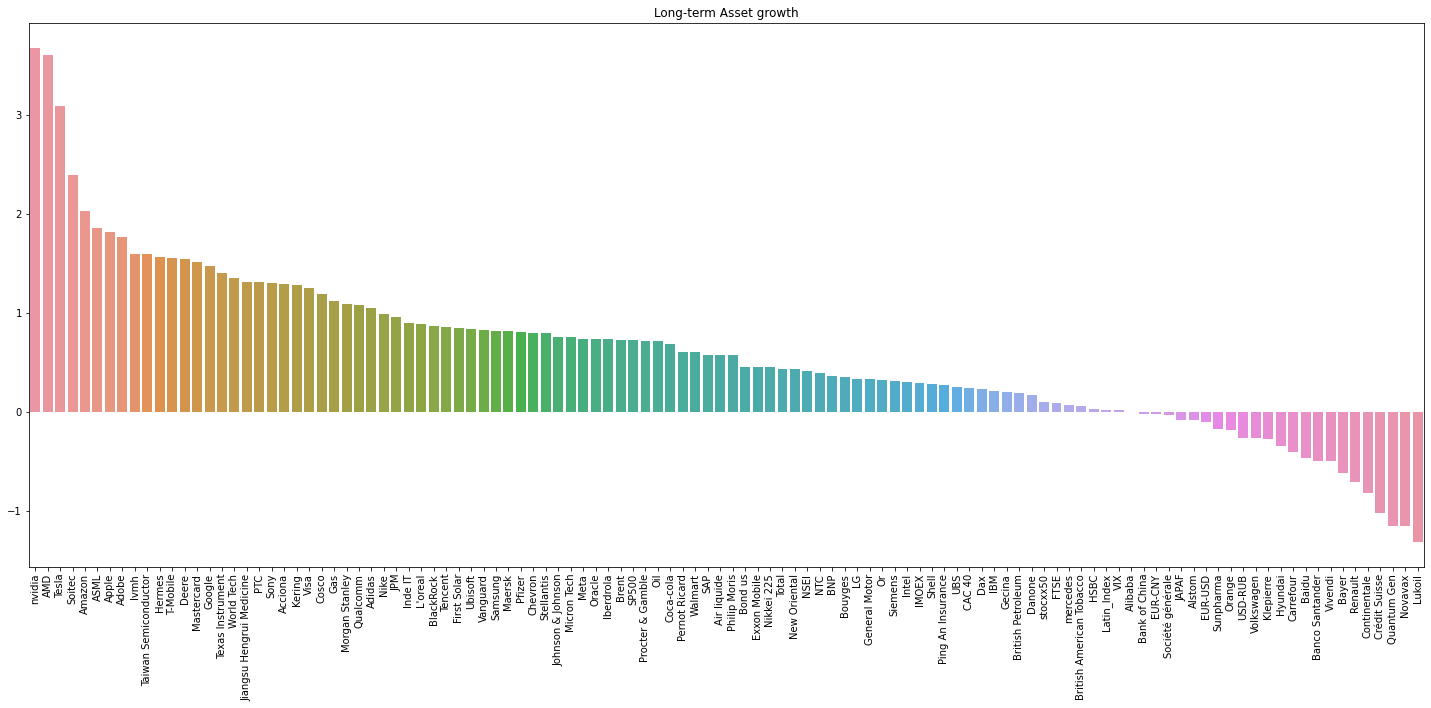

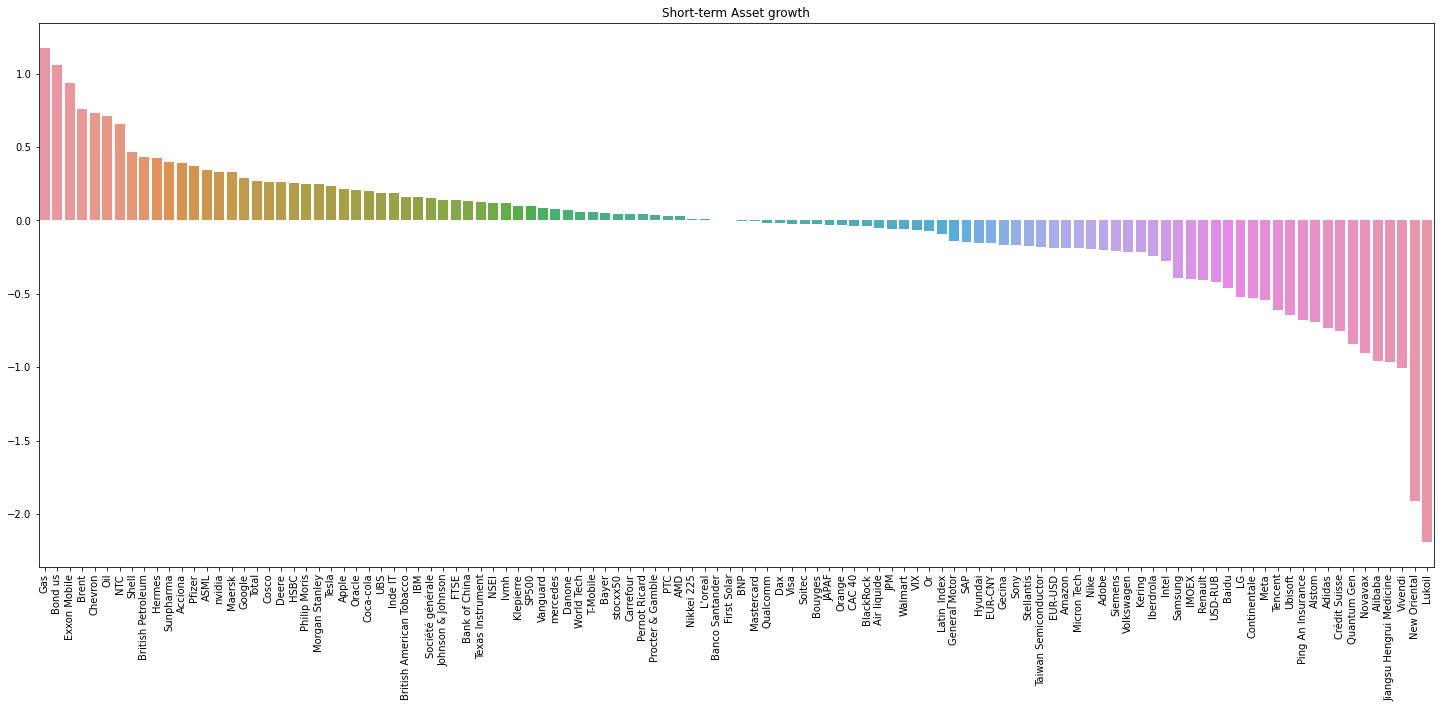

In [13]:
# Affichage graphique en barre
plt.figure(figsize = (25,10))
sns.barplot(x = growth_lt.index.values,y = growth_lt.values)
plt.title('Long-term Asset growth')
plt.xticks(rotation = 90)

#Affichage graphique en barre
plt.figure(figsize = (25,10))
sns.barplot(x = growth_st.index.values, y = growth_st.values)
plt.title('Short-term Asset growth')
plt.xticks(rotation = 90)
;

The **pareto's principle** suggests that the top 20% of companies in a financial system are likely responsible for 80% of the total return distribution of that system. We asume then **top companies behaviour give essential information about the whole market dynamic**.

Based on pareto's principles, we can modelling the abstract physical form of the financial system by a **head** and a **body** where the body is subject to the will of the head.

**Basically the head of financial market is a set composed by the top 20% of asset in term of growth over a given period**.

In [14]:
#I)Long-Term

    #a) From series to dataframe
growth_lt = growth_lt.to_frame()

    #b) Rename the column
growth_lt = growth_lt.rename(columns = {0:'Growth'})

    #c) Head 
lt_head = growth_lt[growth_lt['Growth']>= np.percentile(growth_lt, 80)]

#II)Short-Term

    #a)From series to dataframe
growth_st = growth_st.to_frame()

    #b)Rename the column
growth_st = growth_st.rename(columns = {0:'Growth'})

    #c)head
st_head = growth_st[growth_st['Growth']>= np.percentile(growth_st, 80)]

''

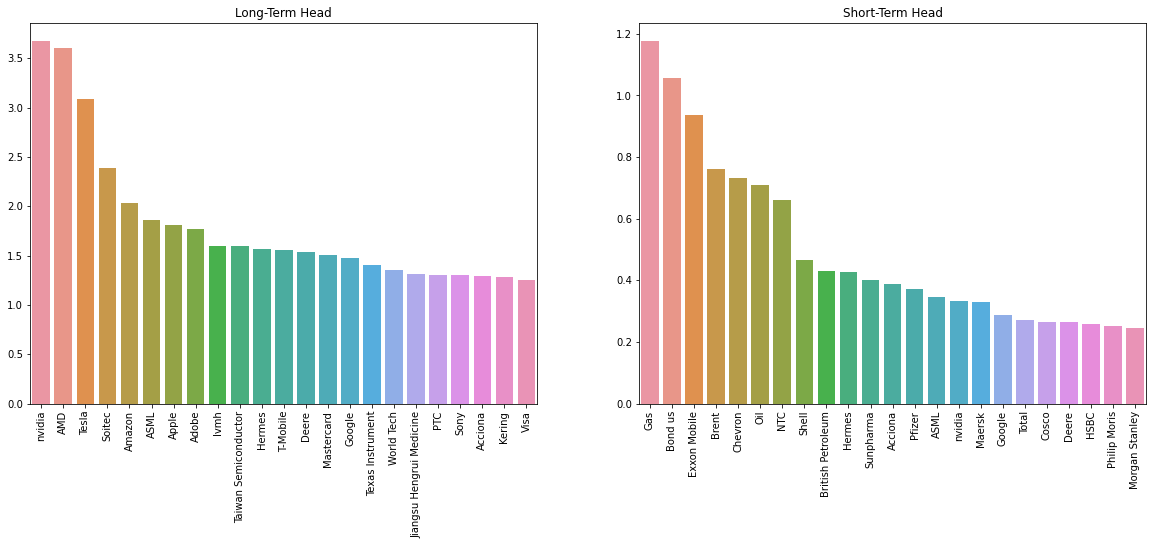

In [15]:
#Long-term Head
plt.figure(figsize = (20,7))
plt.subplot(1,2,1)
sns.barplot(x= lt_head.index.values, y = lt_head.values.squeeze())
plt.xticks(rotation = 90)
plt.title('Long-Term Head')

#Short-Term head
plt.subplot(1,2,2)
sns.barplot(x = st_head.index.values, y = st_head.values.squeeze())
plt.xticks(rotation = 90)
plt.title('Short-Term Head')
;

- **Long term**: High-technology driven companies recorded the best performance over the long-term period.We can also notice that most of them are involved in new emerging technological infrastructure **(semiconductor,blockchain,spatial computing,Biotech etc..)**. It means the market believe in the ability of new technology to create value.


- **Short term**:Since 2022 there has been a sharp increase in us bonds and global energy infrastructure. This follows the FED's interest rate hike, which has led to a reduction of risk-taking and a consequent rejection of the once popular technology-related asset.



# II) Dependency structure analysis

- **Goal:** Extract additional information on asset relationship based on theirs correlation structure.

## 1) Correlation matrix.

We build 2 matrixes to track similar behaviour in **cumulative return** and **volatility**. We choose log cumulative return over return because of its compounded effect that give a more complete measure of the overall performance.


In [16]:
#Cumulative return matrix
pcm_r = c_return.corr()

#Commun stress factor
pcm_v = vol.corr()

## 2) Network Construction

From each matrix we can draw a graph (G) such that **G = (V,E)** where:

- V= Return vector.
- E= Correlations matrix.

To do so we built 2 dataframes from the 2 matrixes above so that we have 3 columns **var1**,  **var2**, **Corr**.

In [17]:
#Cumulative Return links
links_r = pcm_r.stack().reset_index()
links_r.columns = ['var1', 'var2','corr']

#Volatility links
links_v = pcm_v.stack().reset_index()
links_v.columns = ['var1','var2','corr']

### a) Return correlation

We split the asset correlation between 2 categories, **positive** and **negative** one.

####  Positive return correlation

We build edges for all **correlation at least equal to 0.7**.

In [18]:
# Links
pos_links_r_fl = links_r[(links_r['corr'] >= 0.8) & (links_r['var1']!=links_r['var2'])]

# Graph
Gpr=nx.from_pandas_edgelist(pos_links_r_fl, 'var1', 'var2', 'corr')

- **Louvain Method**: Technique d'apprentissage non-supervisé.

the function **best_partition** of class the **community.community_louvain** help to identify the communities inside a network. the **resolution** parameter granularity optimiation.

In [19]:
#Community detection: Louvain Method
PRC_cluster = pd.DataFrame.from_dict(data = best_partition(Gpr, resolution = 1.1), orient = 'index', columns = {'Cluster'})

# Clusters number
print('Number of cluster is',len(PRC_cluster['Cluster'].unique()))

Number of cluster is 6


''

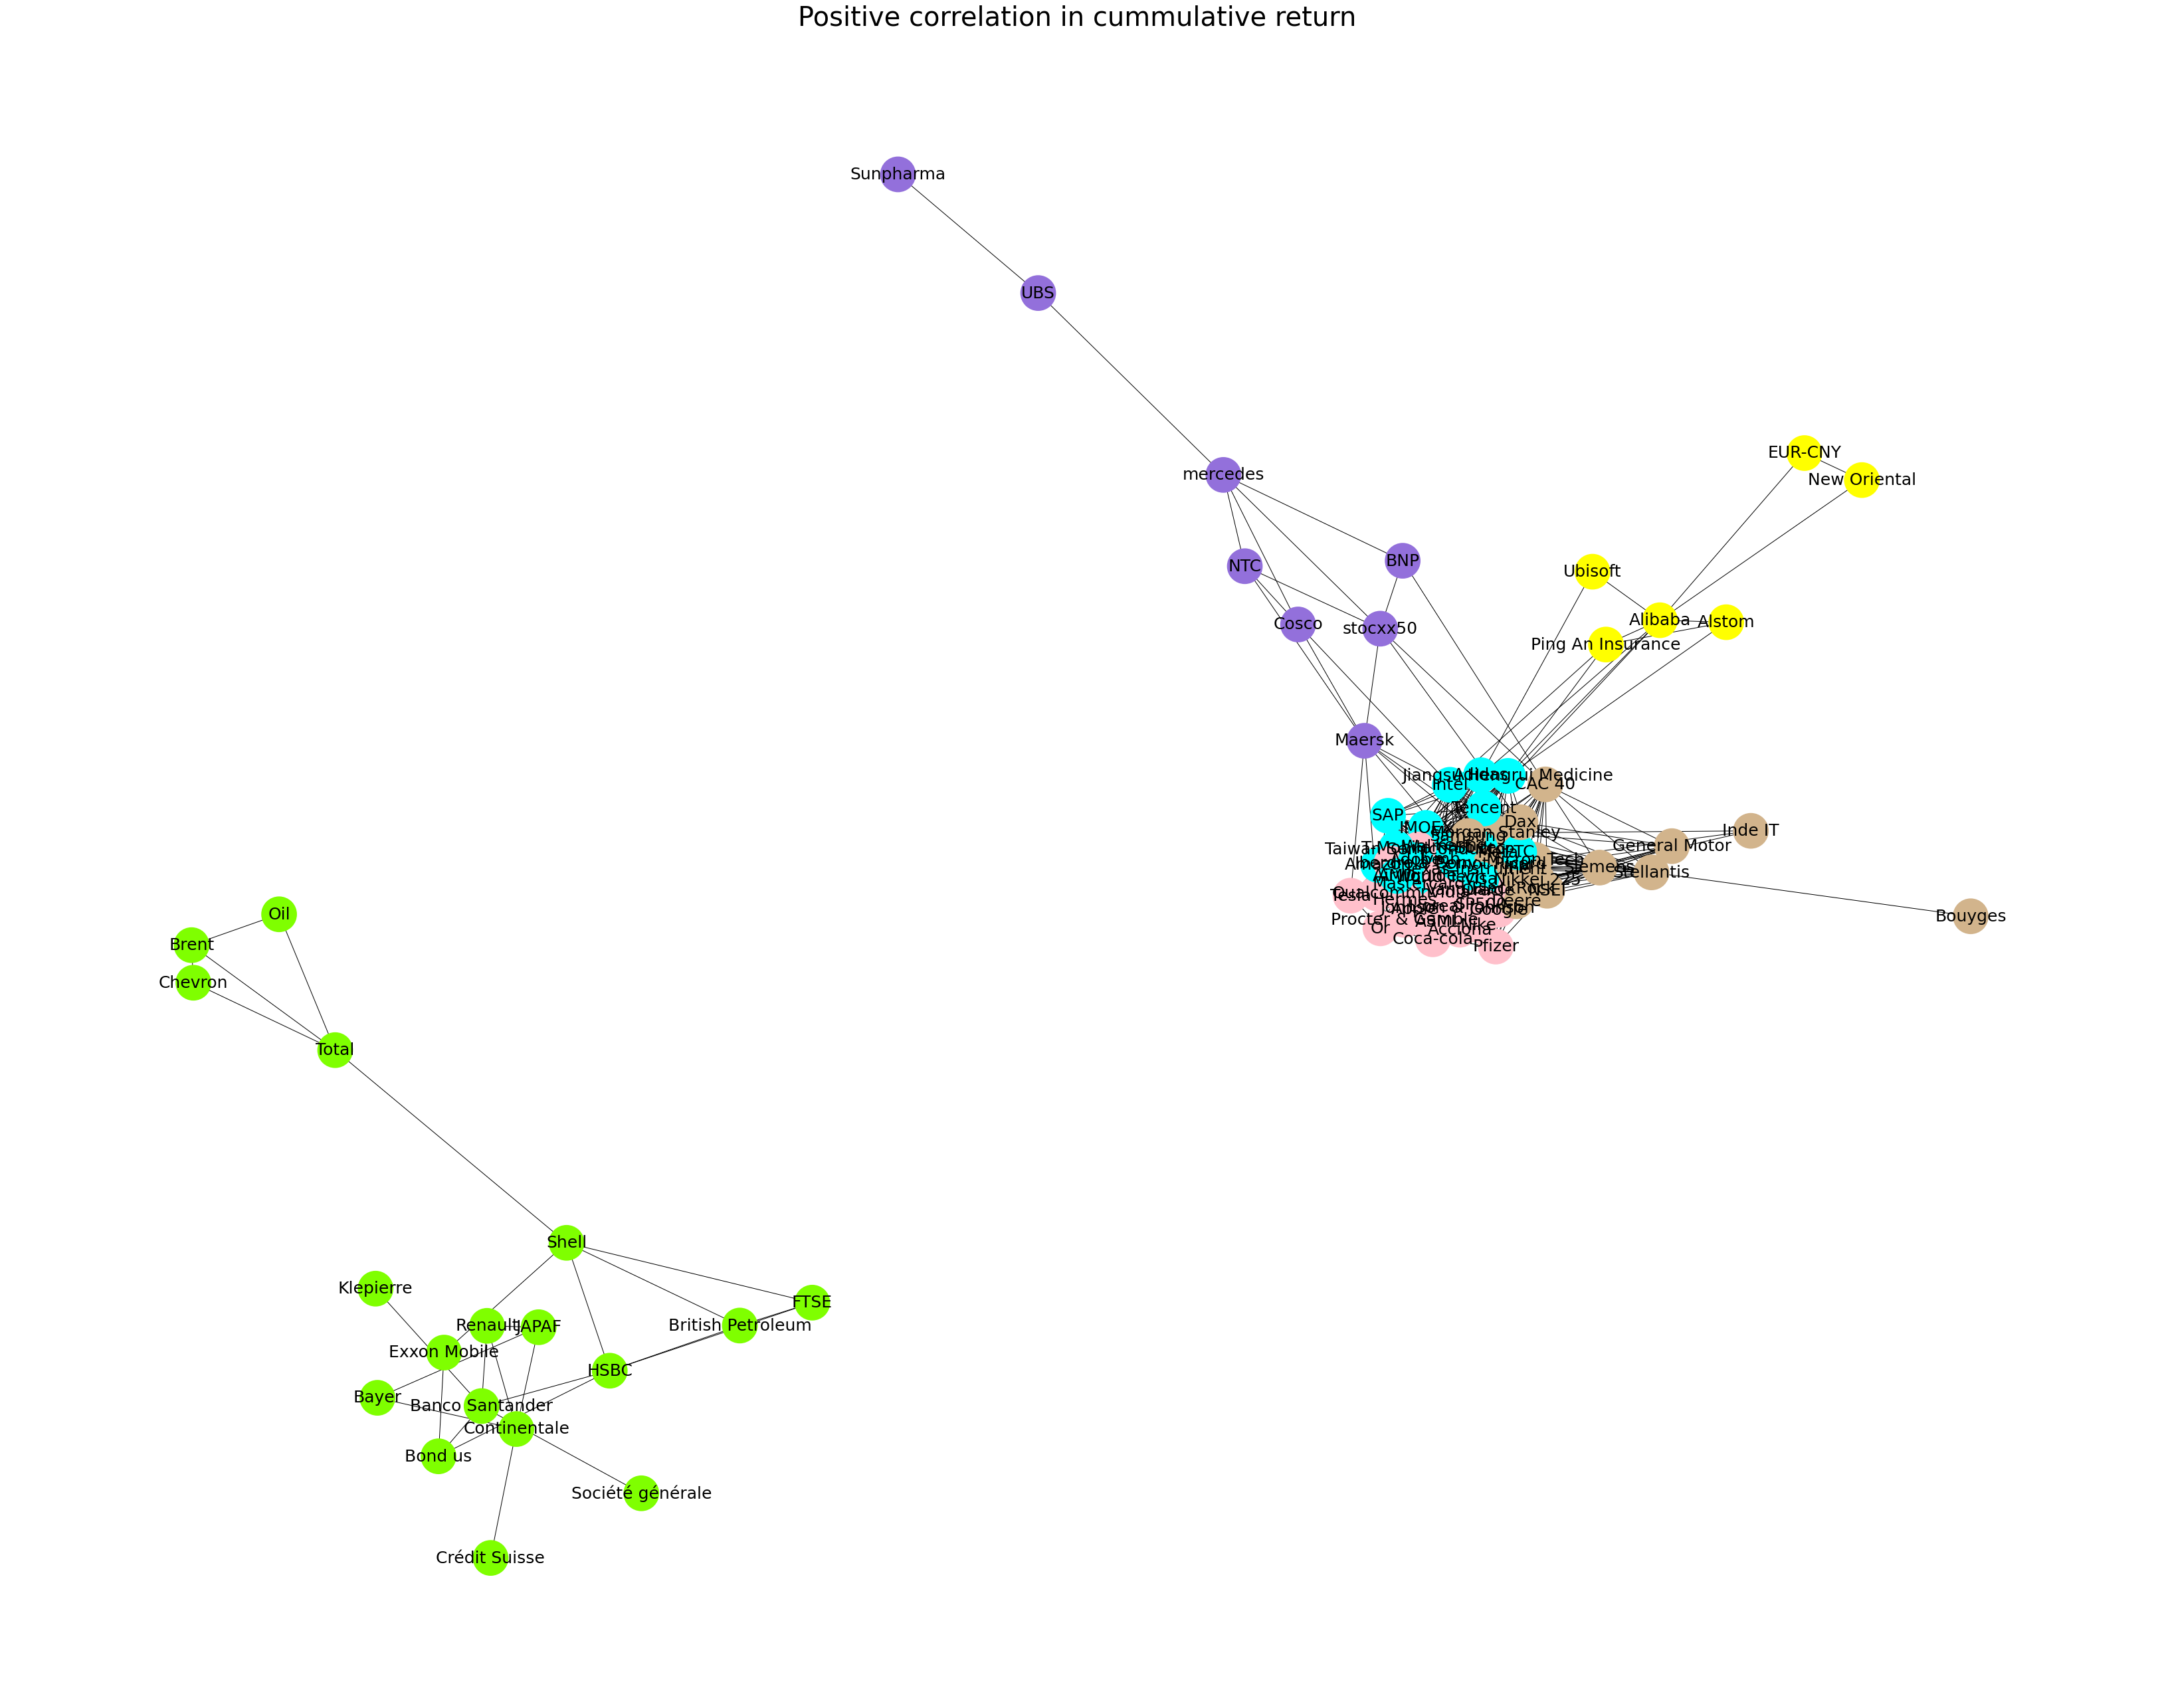

In [24]:
#List of color: PRC_cluster_colors
PRC_cluster_colors = []
for nodes in PRC_cluster['Cluster'].values:
    if nodes ==0:
        PRC_cluster_colors.append('pink')
    elif nodes ==1:
        PRC_cluster_colors.append('yellow')
    elif nodes ==2:
        PRC_cluster_colors.append('tan')
    elif nodes ==3:
        PRC_cluster_colors.append('cyan')
    elif nodes ==4:
        PRC_cluster_colors.append('chartreuse')  
    else :
        PRC_cluster_colors.append('mediumpurple')

# Visualization
plt.figure(figsize = (45,35)) 
nx.draw(Gpr, with_labels=True, pos = nx.spring_layout(Gpr, k= 0.2)
    ,node_color=PRC_cluster_colors,node_size=1500, edge_color='black', linewidths=15, font_size=25)
plt.title('Positive correlation in cummulative return ',fontsize = (40))
;


For a level of correlation at least equal to 0.8 we get **6 clusters**.

**Centrality analysis**

To get information about the **informal power** of each asset in the network we compute some **centrality metrics**:
- **Eigenvector**: measure the potential of direct-influence on other asset.
- **Degree**: Measure to what extent an asset is connected to influent asset.
- **Closeness**: Shortest average distance to other asset.
- **Betweenness**: Measure at which point a node is on the shortest path between other nodes (Intermediary between clusters).

We built a function that takes a network as input and return the top3 asset for each metric mentionned above.

In [25]:
def centrality(network):
    #Eigenvector
    ev = pd.DataFrame.from_dict(nx.eigenvector_centrality(network),orient = 'index',
                    columns = {'Eigenvector'}).sort_values(by = 'Eigenvector',ascending = False)
    #Degree
    deg = pd.DataFrame.from_dict(nx.degree_centrality(network),orient = 'index',
                    columns = {'Degree'}).sort_values(by = 'Degree',ascending = False)
    #closeness
    clo = pd.DataFrame.from_dict(nx.closeness_centrality(network),orient = 'index',
                    columns = {'Closeness'}).sort_values(by = 'Closeness',ascending = False)
    #Betweenness
    bet = pd.DataFrame.from_dict(nx.betweenness_centrality(network),orient = 'index',
                    columns = {'Betweenness'}).sort_values(by = 'Betweenness',ascending = False)
    return print('Higher direct-influence potential:',deg.head(3).index.values),print('Most connected to influent nodes',ev.head(3).index.values),print('Shortest average distance to other asset',clo.head(3).index.values),print('Bridge bewteen clusters',bet.head(3).index.values);
    

In [26]:
centrality(Gpr);

Higher direct-influence potential: ['Texas Instrument' 'Sony' 'lvmh']
Most connected to influent nodes ['Texas Instrument' 'Sony' 'lvmh']
Shortest average distance to other asset ['Texas Instrument' 'lvmh' 'Samsung']
Bridge bewteen clusters ['Morgan Stanley' 'Alibaba' 'Jiangsu Hengrui Medicine']


#### a2) Negative return correlation

In [27]:
#Lien rendement
neg_links_r_filtered = links_r[(links_r['corr'] <= -0.75) & (links_r['var1'] != links_r['var2'])]
Gnr=nx.from_pandas_edgelist(neg_links_r_filtered, 'var1', 'var2', 'corr')

#Dataframe containing cluster label for each graph's node
NRC_cluster = pd.DataFrame.from_dict(data = best_partition(Gnr, resolution = 1.1), orient = 'index', columns = {'Cluster'})

#Cluster nummber
print('Number of cluster is',len(NRC_cluster['Cluster'].unique()))

Number of cluster is 6


''

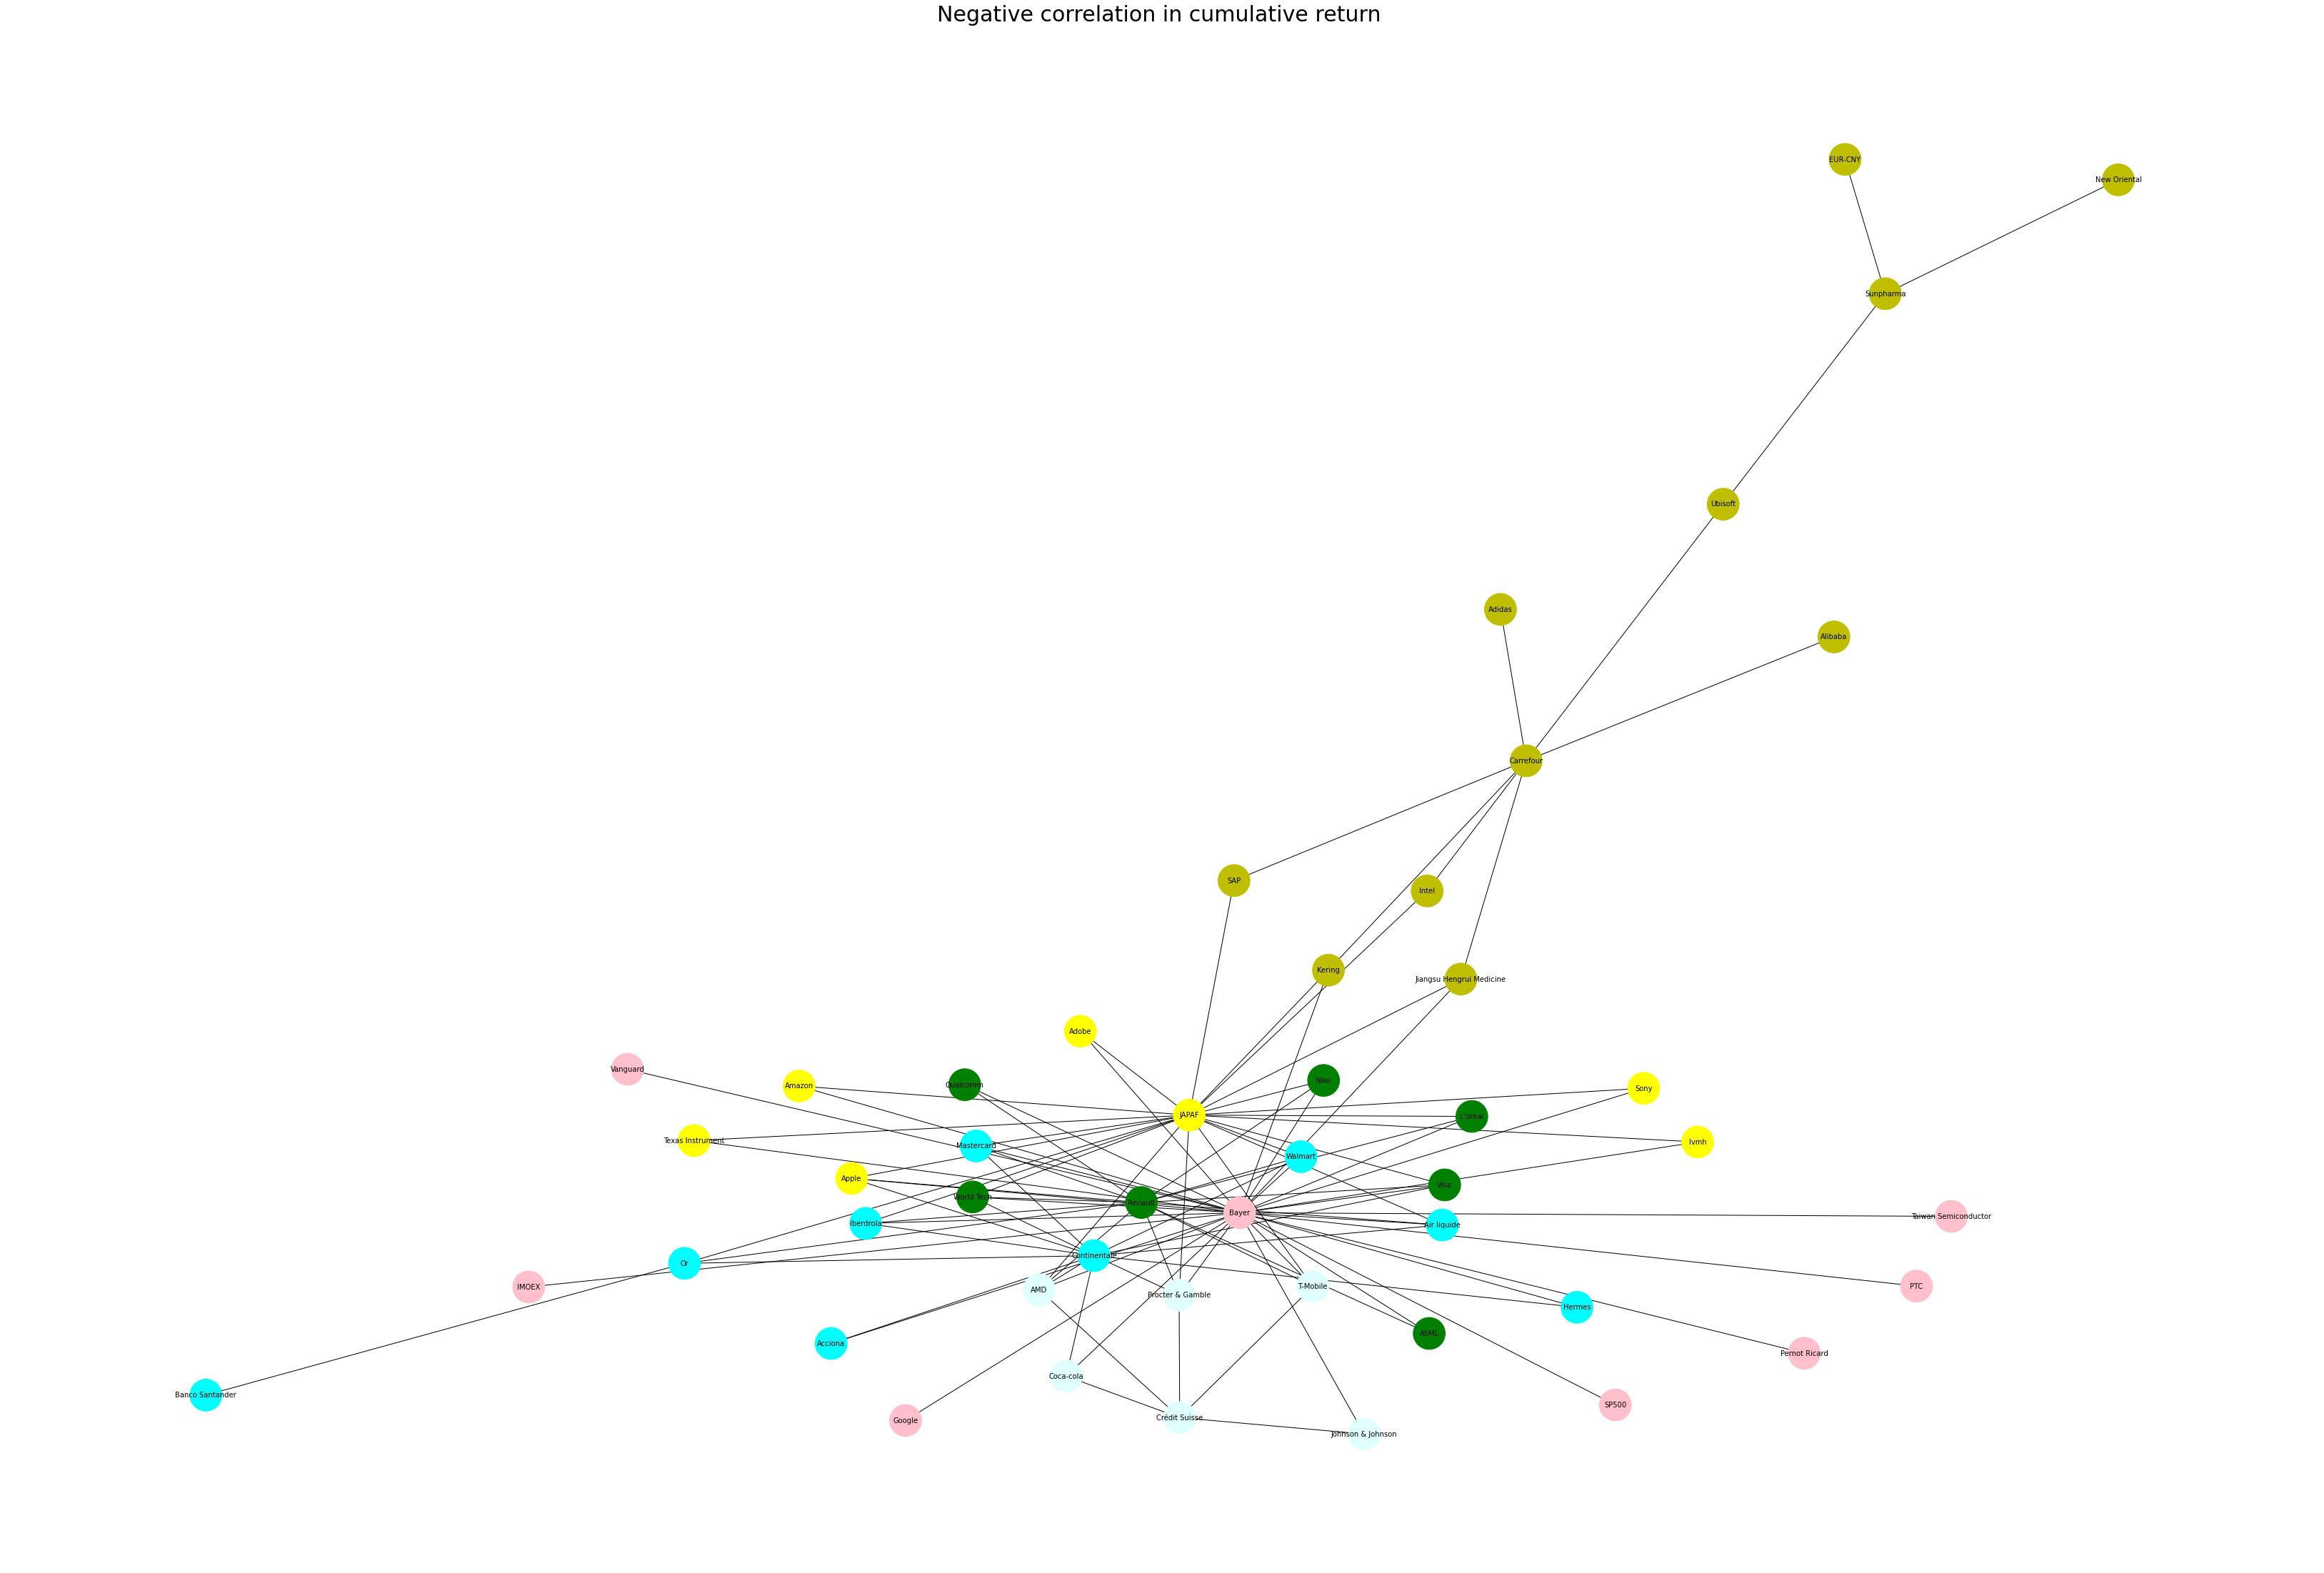

In [29]:
#List of color: PRC_cluster_colors
NRC_cluster_colors = []
for nodes in NRC_cluster['Cluster'].values:
    if nodes ==0:
        NRC_cluster_colors.append('pink')
    elif nodes ==1:
        NRC_cluster_colors.append('yellow')
    elif nodes ==2:
        NRC_cluster_colors.append('green')
    elif nodes ==3:
        NRC_cluster_colors.append('cyan')
    elif nodes ==4:
        NRC_cluster_colors.append('y')
        
    else :
        NRC_cluster_colors.append('lightcyan')

#Visualization
plt.figure(figsize = (45,30))
nx.draw(Gnr, with_labels=True,pos = nx.spring_layout(Gnr ,k = 0.1),node_color=NRC_cluster_colors,
        node_size=2000, edge_color='black', linewidths=1, font_size=10)
plt.title('Negative correlation in cumulative return ',fontsize = (30))
;

**Centrality analysis**

In [30]:
centrality(Gnr);

Higher direct-influence potential: ['Bayer' 'JAPAF' 'Renault']
Most connected to influent nodes ['Bayer' 'JAPAF' 'Renault']
Shortest average distance to other asset ['Bayer' 'JAPAF' 'Kering']
Bridge bewteen clusters ['Bayer' 'JAPAF' 'Carrefour']


### b) Volatility Correlation 

We assume strong positive volatility correlation means both assets are stressed by the same signal.
It also gives a pattern of risk contagion.

In [31]:
#Link: volatility correlation > 0.7
pos_links_v_fl = links_v[(links_v['corr'] >= 0.7) & (links_v['var1']!=links_v['var2'])]

#Network Construction
Gpv=nx.from_pandas_edgelist(pos_links_v_fl, 'var1', 'var2', 'corr')

- **Louvain Method**

In [33]:
#Dataframe containing cluster label for each graph's node
PVC_cluster = pd.DataFrame.from_dict(data = best_partition(Gpv, resolution =2 ),
                                     orient = 'index', columns = {'Cluster'})

#Cluster Number
print('Number of cluster is',len(PVC_cluster['Cluster'].unique()))
;

Number of cluster is 8


''

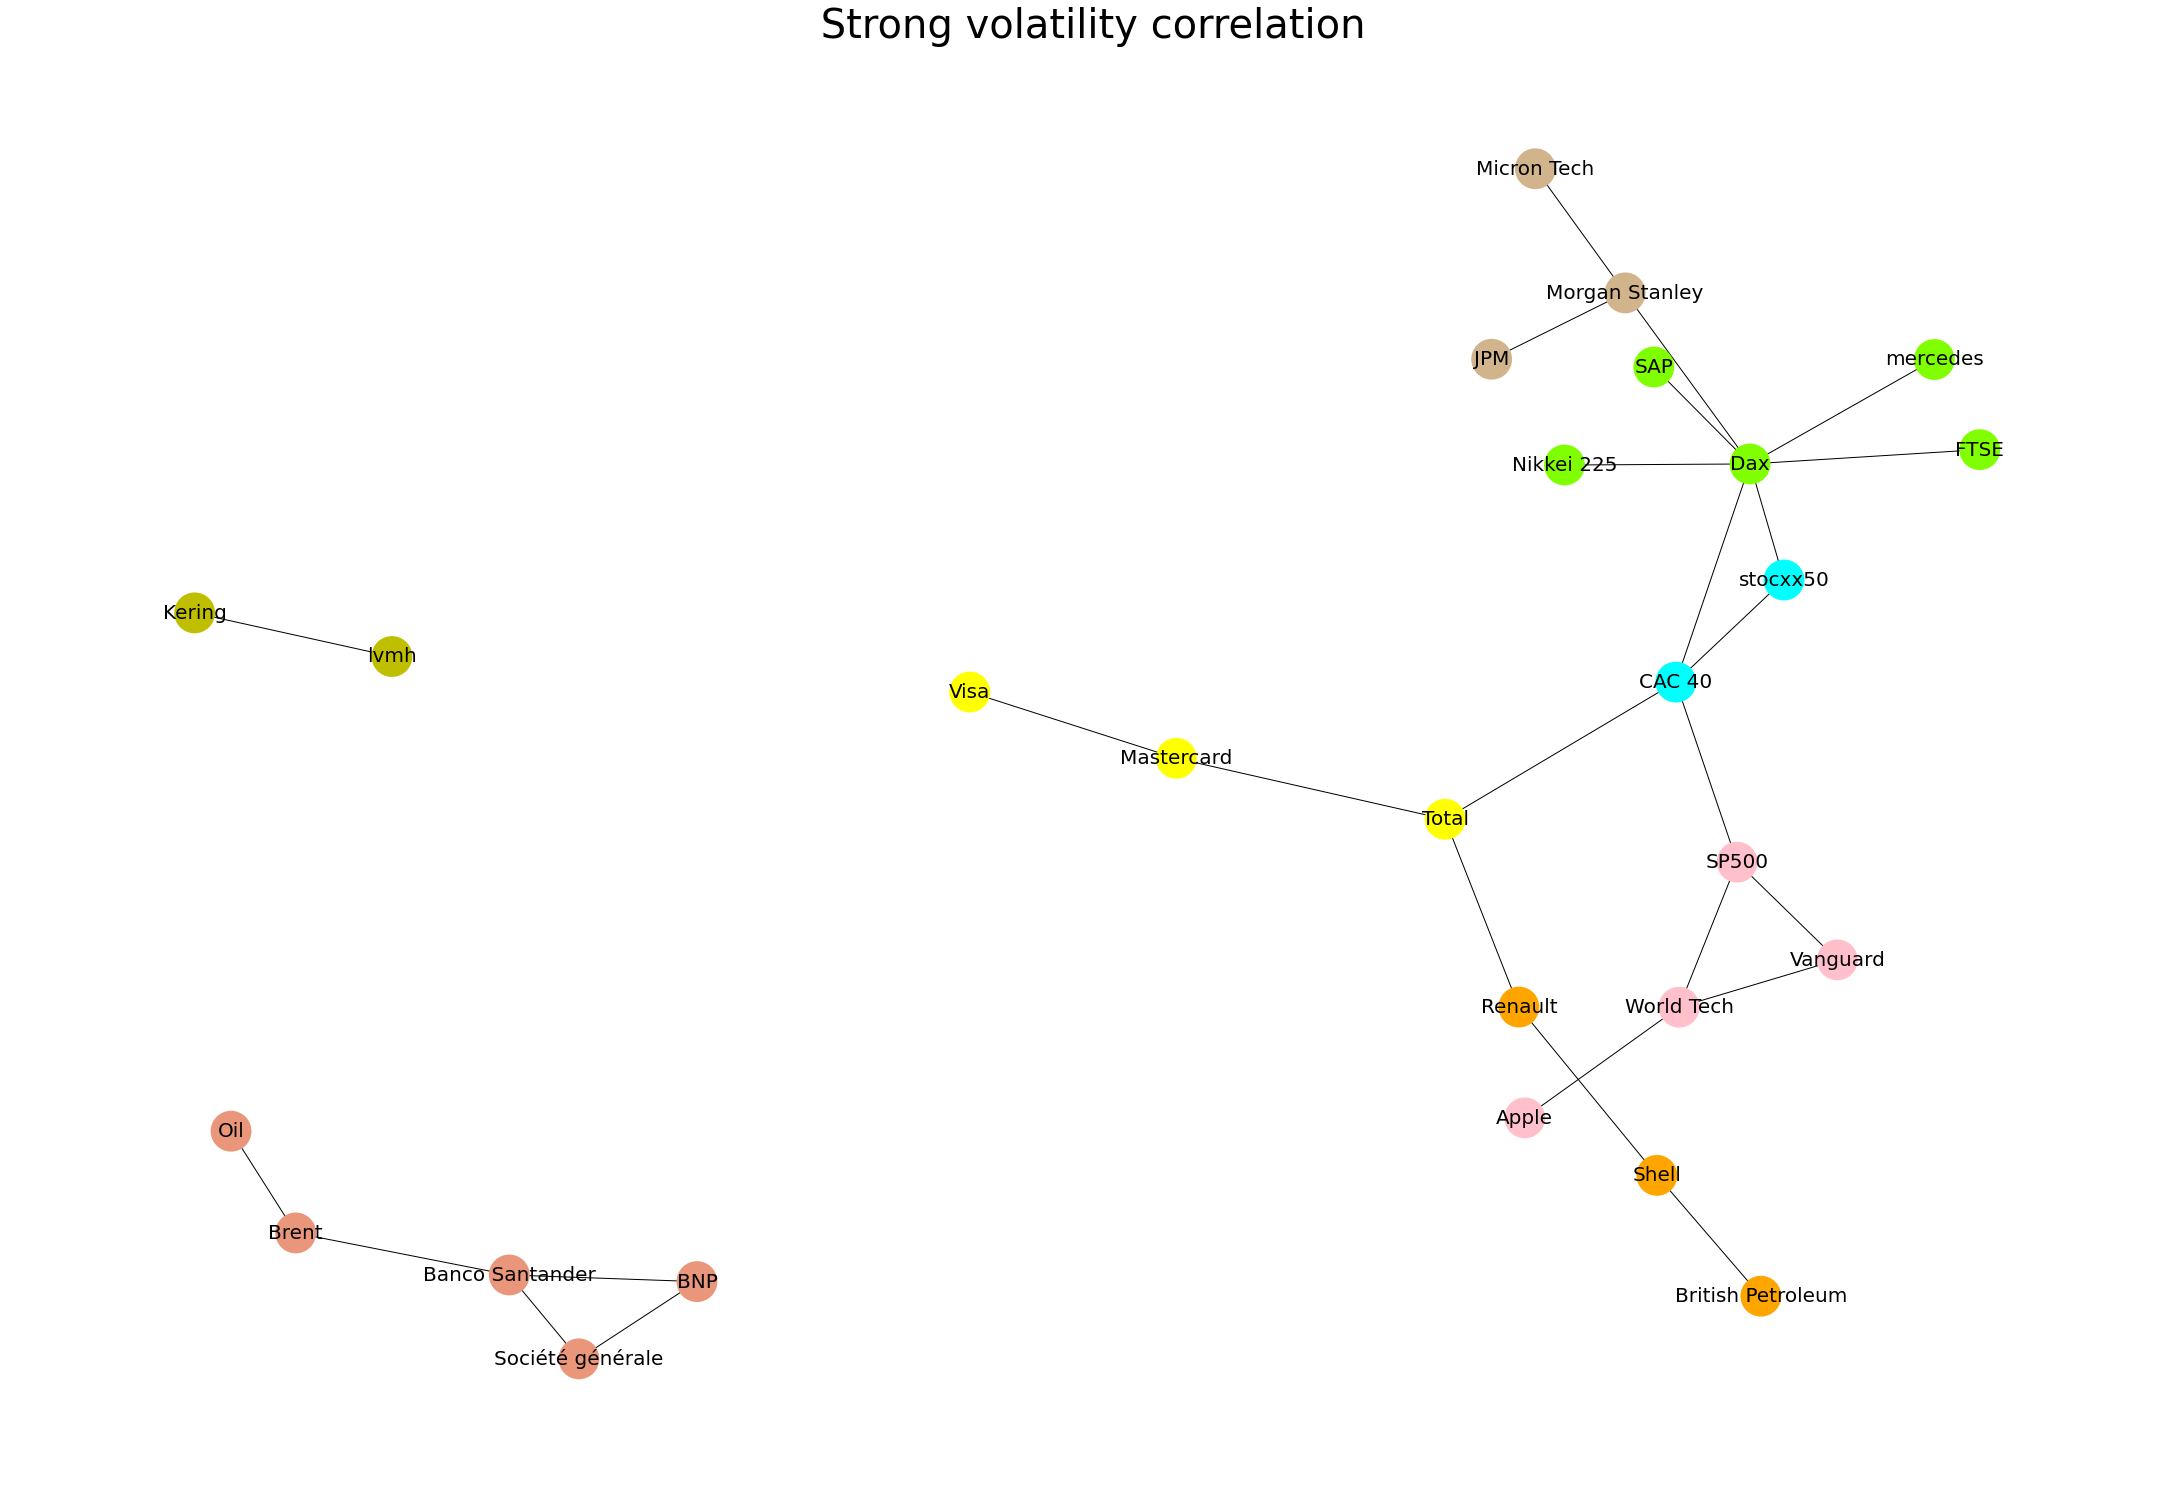

In [34]:
#List of color: PVC_cluster_colors
PVC_cluster_colors = []
for nodes in PVC_cluster['Cluster'].values:
    if nodes ==0:
        PVC_cluster_colors.append('pink')
    elif nodes ==1:
        PVC_cluster_colors.append('yellow')
    elif nodes ==2:
        PVC_cluster_colors.append('orange')
    elif nodes ==3:
        PVC_cluster_colors.append('cyan')
    elif nodes ==4:
        PVC_cluster_colors.append('y')
        
    elif nodes ==5:
        PVC_cluster_colors.append('darksalmon')
        
    elif nodes ==6:
        PVC_cluster_colors.append('tan')
    
    elif nodes ==7:
        PVC_cluster_colors.append('chartreuse')
    
    else :
        PVC_cluster_colors.append('skyblue')

#Visualization
plt.figure(figsize = (30,20)) 
nx.draw(Gpv, with_labels=True, pos = nx.spring_layout(Gpv, k = 0.3),node_color=PVC_cluster_colors,
        node_size=950, edge_color='black', linewidths=10, font_size=20)
plt.title(' Strong volatility correlation',fontsize = (40));

For a correlation level at least equal to 0.7 we get **8 classes of risk**. The network highlights a pattern of risk diffusion.

**Centrality Analysis**

In [30]:
centrality(Gpv);

Higher direct-influence potential: ['Dax' 'CAC 40' 'Morgan Stanley']
Most connected to influent nodes ['Dax' 'CAC 40' 'stocxx50']
Shortest average distance to other asset ['CAC 40' 'Dax' 'Total']
Bridge bewteen clusters ['CAC 40' 'Dax' 'Total']


## 3) Cluster Analysis

- **a - Cluster Labelling**

We get 6 clusters in positive return correlation network. It means there are essentially 6 types of behaviour that are emerging from our financial system.


We stock each of them in a variables from a to f.

In [35]:
#Network1: Clusters
a = PRC_cluster[PRC_cluster['Cluster'] == 0].index.values
b = PRC_cluster[PRC_cluster['Cluster'] == 1].index.values
c = PRC_cluster[PRC_cluster['Cluster'] == 2].index.values
d = PRC_cluster[PRC_cluster['Cluster'] == 3].index.values
e = PRC_cluster[PRC_cluster['Cluster'] == 4].index.values
f = PRC_cluster[PRC_cluster['Cluster'] == 5].index.values #Energy infrastructure

- **b - Cluster historical return**

Once we got the cluster name, we can build a dataframe where the index are the clusters and the variables theirs properties: Mean return, Risk, Skew, Kurtosis, Sharpe ratio etc...

To do that, we first build a dataframe **cf** where we stocks historical return of each cluster.

In [36]:
#Cluster historical return
cluster_a_r = (returns[a]).sum(axis = 1)/len(a)
cluster_b_r = (returns[b]).sum(axis = 1)/len(b)
cluster_c_r = (returns[c]).sum(axis = 1)/len(c)
cluster_d_r = (returns[d]).sum(axis = 1)/len(d)
cluster_e_r = (returns[e]).sum(axis = 1)/len(e)
cluster_f_r = (returns[f]).sum(axis = 1)/len(f)

cf = pd.DataFrame({'A':cluster_a_r,'B':cluster_b_r,'C':cluster_c_r,'D':cluster_d_r,
                  'C':cluster_c_r, 'D':cluster_d_r,'E':cluster_e_r,'F':cluster_f_r})

- **Properties dataframe**

From **cf** we can now compute the dataframe **cp** that contains each clusters properties mentionned above.

We use the module **scipy** to compute **kurtosis** and **skew** and **Value at risk** *(Cornish_Fisher)*.

In [37]:
from scipy.stats import kurtosis, skew, norm

#Value at risk: Cornish_Fisher for 5% as alpha quantile
def cornish_fisher(ret):
    'Take asset return as input and return VaR'
    z = norm.ppf(0.05)
    zzz = z + (z**2 - 1) * skew(ret) / 6 + (z**3 - 3*z) * (kurtosis(ret)-3) / 24 - (2*z**3 - 5*z) * (skew(ret)**2) / 36
    return -(ret.mean()+zzz*ret.std())

Let's build a function called **cluster_properties** that take the historical return of each cluster as input and return the financial properties of these clusters.

In [38]:
def cluster_properties(df):
    a = pd.concat([df.mean(), df.std(), df.aggregate(kurtosis), 
                df.aggregate(skew),df.mean()/df.std(), df.aggregate(cornish_fisher)],axis = 1)
    #Rename columns
    a.columns = ['Mean Return','Volatility', 'Kurtosis', 'Skewness', 'Risk-Adjusted','VaR']
    return a

In [39]:
lt_cp = cluster_properties(cf) # long-Term properties
st_cp = cluster_properties(cf['2022':]) #Short-Term properties

We now want to dashboard our cluster properties

In [40]:
def plot_cp(cluster_properties):
    plt.figure(figsize = (15,7))
    for i,n in zip(cluster_properties.columns,range(1,8)):
        plt.subplot(3,3,n)
        sns.barplot(x = cluster_properties.index, y = cluster_properties[i], data = cluster_properties)
        plt.grid();

**Long term properties**

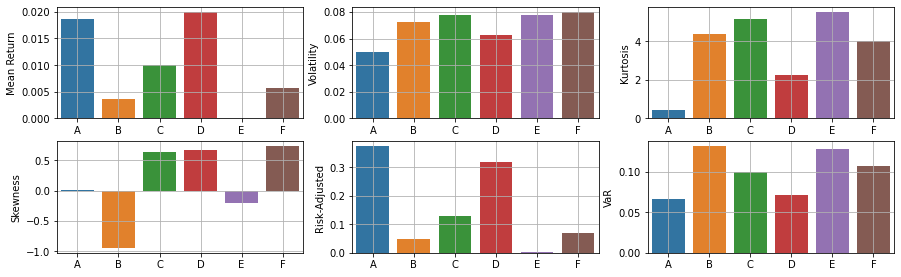

In [41]:
plot_cp(lt_cp)

**Short-term properties**


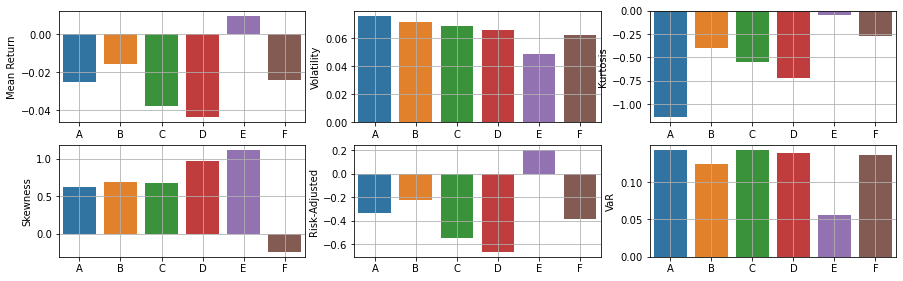

In [42]:
plot_cp(st_cp)

**Cluster properties report.**
 
- Obs1: Cluster **B** seems to go in the opposite direction of the other clusters.

- Obs2: The other clusters seems to go in the same direction. They get a positive long-term mean return and a negative short term mean return.


- **Cluster correlation matrix**

Now let's see how similar are our clusters. To do so, we compute correlation matrix based on cluster average historical return. We assume that a correlation is significant when the coefficient is above 0.8.

''

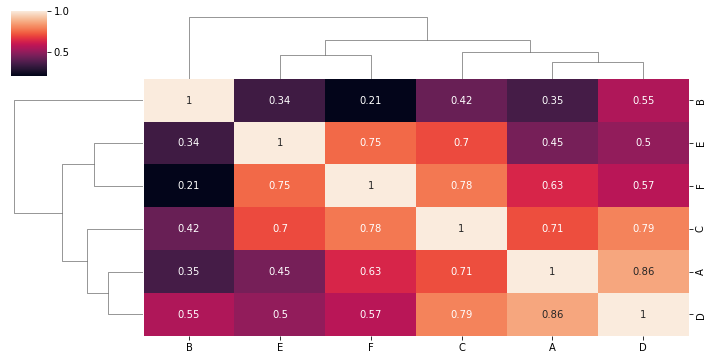

In [43]:
#Cluster correlation matrix
sns.clustermap(cf.corr(), figsize = (10,5), annot = True)
;

## Asset Selection.

We want our portfolio to capture the performance of these 6 clusters we identifed.

In [45]:
#portfolio
p = (cf.sum(axis = 1)/len(cf.columns)).cumsum()

**Visualization: portfolio vs benchmark**

We want to compare visually the performance of our equally weighted portfolio versus **CAC 40** and **SP500**

''

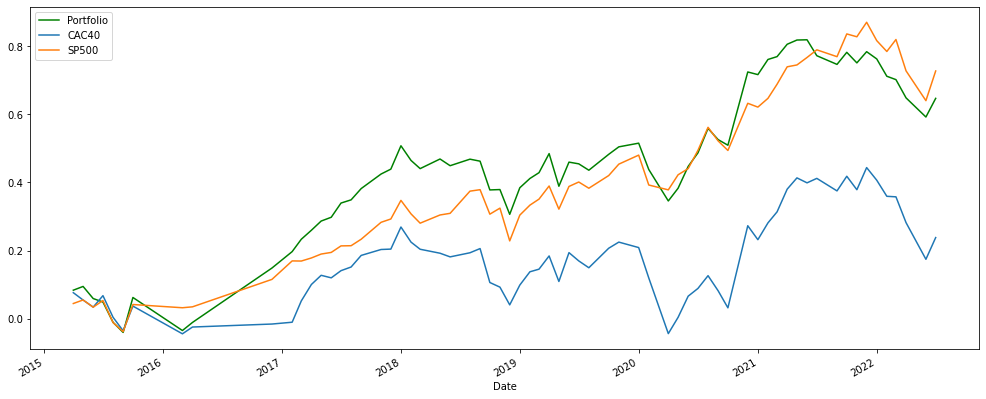

In [46]:
p.plot(label = 'Portfolio',color = 'green',figsize = (17,7))
c_return['CAC 40'].plot(label='CAC40')
c_return['SP500'].plot(label='SP500')

plt.legend()
;

# Conclusion

**Trend & Dynamics** : The rise in interest rate replace the market appetite for new emerging-technologies by energy and bonds. In other word, risk appetite has been replaced by safety appetite.

**Network clustering**: Over the desired studied period (2015-2023) we identified:

- **6 classes of return** where one (*energy infrastructure*) is going against the others.
- **8 classes of risk**
- **6 classes of negative correlation**

**Futher**: In the next works we will use the results of this research to make a **portfolio optimization**.